## Tax Classes

In [1]:
# Imports
import functions as fc
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales2.csv")


# Data Types of the Data Frame post changing
print(sales_frame.dtypes)

BOROUGH                            object
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                          int64
SALE DATE                          object
dtype: object


In [2]:
# Steuerklassen:
# - Klasse 1: Umfasst die meisten Wohneigentumsbestände mit bis zu drei Einheiten (wie Ein-, Zwei- und Dreifamilienhäuser und kleine Geschäfte oder Büros mit einer oder zwei angeschlossenen Wohnungen), leere Grundstücke, die für Wohnzwecke in Zonen eingeteilt sind, und die meisten Eigentumswohnungen, die nicht mehr als drei Stockwerke haben.

# - Klasse 2: Umfasst alle anderen Immobilien, die hauptsächlich Wohnzwecken dienen, wie Genossenschaften und Eigentumswohnungen.

# - Klasse 3: Umfasst Immobilien mit Geräten, die einem Gas-, Telefon- oder Elektrizitätsunternehmen gehören.

# - Klasse 4: Umfasst alle anderen Immobilien, die nicht in den Klassen 1, 2 und 3 enthalten sind, wie z.B. Büros, Fabriken, Lagerhäuser, Garagengebäude usw.

tax_classes = sales_frame['TAX CLASS AT PRESENT'].value_counts()
print(tax_classes)

N = len(sales_frame)

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64


### Tax Class 1

In [3]:
taxclass1 = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "1"])
taxclass1A = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "1A"])
taxclass1B = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "1B"])
taxclass1C = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "1C"])
taxclass1gesamt = taxclass1 + taxclass1A + taxclass1B + taxclass1C
taxclass1proz = taxclass1gesamt/N*100
print(taxclass1gesamt)
print(int(taxclass1proz), "%")
print(int(taxclass1proz), "% der Verkäufe (=", taxclass1gesamt, "), sind Ein-, Zwei- und/oder Dreifamilienhäuser.")


41497
49 %
49 % der Verkäufe (= 41497 ), sind Ein-, Zwei- und/oder Dreifamilienhäuser.


### Tax Class 2

In [4]:
taxclass2 = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "2"])
taxclass2A = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "2A"])
taxclass2B = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "2B"])
taxclass2C = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "2C"])
taxclass2gesamt = taxclass2 + taxclass2A + taxclass2B + taxclass2C
taxclass2proz = taxclass2gesamt/N*100
print(taxclass2gesamt)
print(int(taxclass2proz), "%")
print(int(taxclass2proz), "% der Verkäufe (=", taxclass2gesamt, "), sind Immobilien, die hauptsächlich Wohnzwecken dienen, wie Genossenschaften und Eigentumswohnungen.")

36169
42 %
42 % der Verkäufe (= 36169 ), sind Immobilien, die hauptsächlich Wohnzwecken dienen, wie Genossenschaften und Eigentumswohnungen.


### Tax Class 3

In [5]:
taxclass3 = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "3"])
taxclass3proz = taxclass3/N*100
print(taxclass3)
print(int(taxclass3proz), "%")
print("Weniger als 1% (=", taxclass3, ") der Verkäufe umfasst Immobilien mit Geräten, die einem Gas-, Telefon- oder Elektrizitätsunternehmen gehören.")

4
0 %
Weniger als 1% (= 4 ) der Verkäufe umfasst Immobilien mit Geräten, die einem Gas-, Telefon- oder Elektrizitätsunternehmen gehören.


### Tax Class 4

In [6]:
taxclass4 = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == "4"])
taxclass4proz = taxclass4/N*100
print(taxclass4)
print(int(taxclass4proz), "%")
print(int(taxclass4proz), "% der Verkäufe (=", taxclass4, "), umfasst alle anderen Immobilien, die nicht in den Klassen 1, 2 und 3 enthalten sind, wie z.B. Büros, Fabriken, Lagerhäuser, Garagengebäude usw.")

6140
7 %
7 % der Verkäufe (= 6140 ), umfasst alle anderen Immobilien, die nicht in den Klassen 1, 2 und 3 enthalten sind, wie z.B. Büros, Fabriken, Lagerhäuser, Garagengebäude usw.


### Without Tax Class

In [7]:
taxclass0 = len(sales_frame[sales_frame["TAX CLASS AT PRESENT"] == " "])
print(taxclass0)
print(taxclass0, "Datensätze sind ohne Tax Class versehen.")

738
738 Datensätze sind ohne Tax Class versehen.


### Pie Plot Visual

   TAX CLASS AT PRESENT  COUNT
0                          738
1                     1  38633
2                    1A   1444
3                    1B   1234
4                    1C    186
5                     2  30919
6                    2A   2521
7                    2B    814
8                    2C   1915
9                     3      4
10                    4   6140


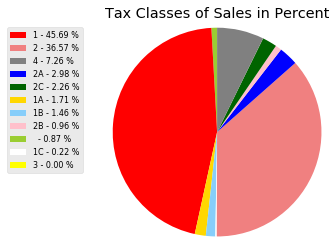

In [8]:
# Grouping by Tax Class and Counting number of sales per tax class
tax_classes_grouped = sales_frame.groupby(["TAX CLASS AT PRESENT"])
tax_classes_grouped_counts = tax_classes_grouped["SALE PRICE"].count().reset_index(name="COUNT")
print(tax_classes_grouped_counts)

x = tax_classes_grouped_counts["TAX CLASS AT PRESENT"]
y = tax_classes_grouped_counts["COUNT"]
# Defining colors for graphic and defining variable percent
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
percent = 100.*y/y.sum()

# Plotting variable v into a pie chart and defining variable "labels" which shows tax class and percentage of whole sum on left side of graphic
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

# Sorting legend by highest percentual value
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.title("Tax Classes of Sales in Percent")
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig("graphics/Tax Classes of Sales in Percent.jpg", bbox_inches="tight")